<a href="https://colab.research.google.com/github/khan5125/ML-models/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer # to convert text into number
from tensorflow.keras.preprocessing.sequence import pad_sequences # use to equal sequences

from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam # complile the learning rate of the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping # To stop the Model

import re


**Loading Dataset**

In [ ]:
# Load a subset of the training data
with open('/content/train.ft.txt', 'r', encoding='utf-8') as f:
    training_data = [f.readline().strip() for _ in range(20000)]

# Load a subset of the training data
with open('/content/test.ft.txt', 'r', encoding='utf-8') as f:
    test_data = [f.readline().strip() for _ in range(5000)]


# Print the subset sizes
print("Training data subset size:", len(training_data))
print("Test data subset size:", len(test_data))

Training data subset size: 20000
Test data subset size: 5000


In [ ]:
training_data[0:5]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 '__label__2 Amazing!: This sound

**Preparing dataset**

In [ ]:
training_data[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [ ]:
# Split the data into labels and texts
training_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in training_data]
training_texts = [re.sub(r'__label__\d ', '', line) for line in training_data]

test_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in test_data]
test_texts = [re.sub(r'__label__\d ', '', line) for line in test_data]

# Convert labels to binary (0 and 1)
training_labels = [0 if label == 1 else 1 for label in training_labels]
test_labels = [0 if label == 1 else 1 for label in test_labels]

In [ ]:
print(test_labels[:4])
print("\n", test_texts[:4])

[1, 1, 0, 1]

 ['Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"', "One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of th

In [ ]:
# training_labels[:20]
test_labels[:10]

[1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

**Data Cleaning**

In [ ]:
import re # use to clean text
import nltk
from nltk.corpus import stopwords # to remove stopers
from nltk.stem import PorterStemmer # convert 2nd,3rd,4th-forms into first-form

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Custom Function
def clean_text(text):
    """Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer() # object
    stop_words = set(stopwords.words('english')) # object (now we are dealing with English)

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keep spaces)
    # it will remove all except letters and get from "text"
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords, apply stemming
    # words by words (by comma) --> means split
    words = text.split() # tokenize
    words = [ps.stem(word) for word in words if word not in stop_words]

    # While returning --> Join words back into a string
    return " ".join(words)

# Its just for checking
clean_text("I am Leaving this 1223357 Number")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'leav number'

In [ ]:
# Apply function to training and test texts
training_texts = [clean_text(text) for text in training_texts]
test_texts = [clean_text(text) for text in test_texts]

In [ ]:
# Check text from data
training_texts[0]

'stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen'

**Tokenization**

In [ ]:
# Tokenization and padding
max_words = 1000
max_sequence_length = 100 # to make sequence equal

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(training_texts)

# To make sequances
X_train = tokenizer.texts_to_sequences(training_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

# To equal all sequences
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [ ]:
# Convert list into Numpy arrays before applying algorithm
X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_train = np.array(training_labels)
print(y_train.shape)
y_test = np.array(test_labels)
print(y_test.shape)

(20000, 100)
(5000, 100)
(20000,)
(5000,)


In [ ]:
'''
100 words in each row

SyntaxError: incomplete input (ipython-input-3709298375.py, line 1)

**Training RNN Model**

In [21]:
# Define improved RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    SimpleRNN(128, return_sequences=True, dropout=0.3),  # RNN layer with dropout (To avoid ovrfitting)
    LayerNormalization(),  # Added normalization for stability
    SimpleRNN(128, dropout=0.3),  # Second RNN layer
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.5029 - loss: 0.8602 - val_accuracy: 0.4960 - val_loss: 0.7100
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5103 - loss: 0.7756 - val_accuracy: 0.5062 - val_loss: 0.6943
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5057 - loss: 0.7514 - val_accuracy: 0.5188 - val_loss: 0.6919
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5119 - loss: 0.7311 - val_accuracy: 0.5290 - val_loss: 0.6909
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5085 - loss: 0.7222 - val_accuracy: 0.5290 - val_loss: 0.6909
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5103 - loss: 0.7189 - val_accuracy: 0.5252 - val_loss: 0.6907
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5112 - loss: 0.7157 - val_accuracy: 0.5344 - val_loss: 0.6890
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5252 - loss: 0.7060 - val_accuracy: 0.5566 -

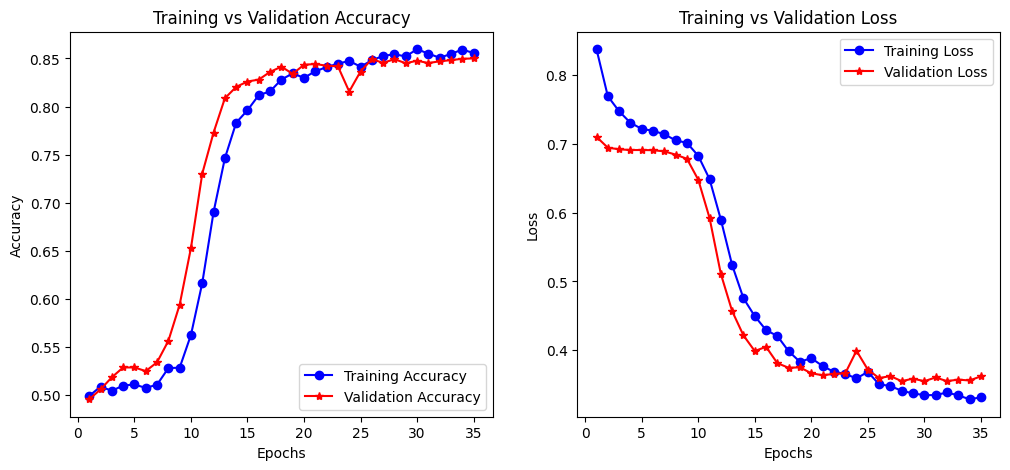

In [22]:
# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [23]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Confusion Matrix:
[[2050  385]
 [ 377 2188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2435
           1       0.85      0.85      0.85      2565

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



**Training LSTM Model**

In [24]:
# Define improved model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),  # Increased embedding size
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),  # Added recurrent dropout
    LayerNormalization(),  # Added normalization for stability
    Dropout(0.3),
    Bidirectional(LSTM(128, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  # Extra dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5202 - loss: 0.8286 - val_accuracy: 0.5976 - val_loss: 0.6682
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5658 - loss: 0.6922 - val_accuracy: 0.6798 - val_loss: 0.6195
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6348 - loss: 0.6356 - val_accuracy: 0.7412 - val_loss: 0.5279
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7217 - loss: 0.5525 - val_accuracy: 0.7790 - val_loss: 0.4734
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7779 - loss: 0.4754 - val_accuracy: 0.7936 - val_loss: 0.4471
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7991 - loss: 0.4423 - val_accuracy: 0.8132 - val_loss: 0.4093
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8170 - loss: 0.4109 - val_accuracy: 0.8210 - val_loss: 0.3976
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8328 - loss: 0.3846 - val_accuracy: 0.8270 - val_loss: 0.3894
Epo

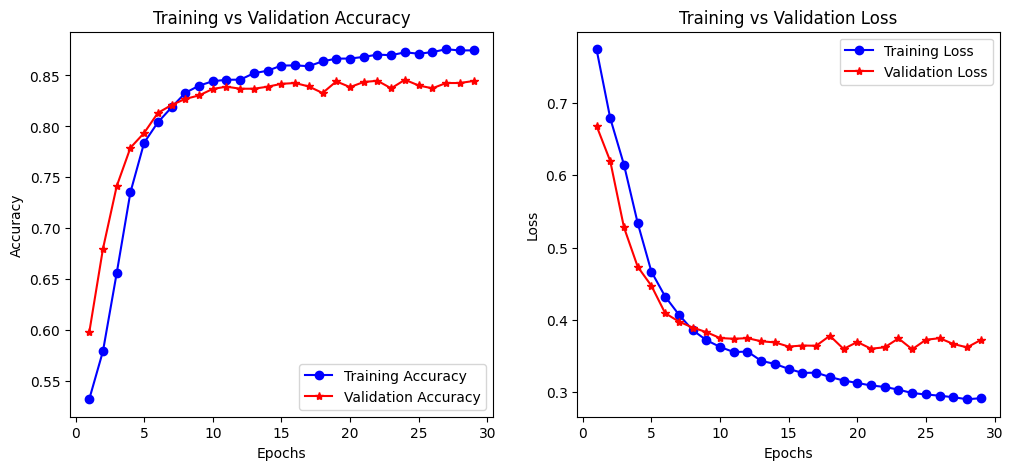

In [25]:
import matplotlib.pyplot as plt

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [26]:
# Evaluate with a confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 228ms/step
Confusion Matrix:
[[1985  450]
 [ 321 2244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2435
           1       0.83      0.87      0.85      2565

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [27]:
'''
LSTM have the best Accuracy
So, I will use LSTM

'''

'\nLSTM have the best Accuracy\nSo, I will use LSTM\n\n'

**Detection System**

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_sequence_length=100):
    # clean text
    text = clean_text(text)
    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([text])

    # Pad sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    # Predict sentiment
    prediction = model.predict(padded_sequence)[0][0]  # Extract scalar value

    # Determine sentiment
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😡"

    return sentiment, float(prediction)
# Example usage:
test_sentences = [
    "I love this product! It's amazing.",
    "This is the worst service I have ever experienced.",
    "The movie was okay, not great but not terrible either."
]

for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
    print(f"Text: {sentence}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Text: I love this product! It's amazing.
Predicted Sentiment: Positive 😊 (Confidence: 0.9183)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Text: This is the worst service I have ever experienced.
Predicted Sentiment: Negative 😡 (Confidence: 0.0201)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Text: The movie was okay, not great but not terrible either.
Predicted Sentiment: Negative 😡 (Confidence: 0.1304)



In [29]:
model.save("lstm_model.h5")  # Saves architecture, weights & optimizer


import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [30]:
import tensorflow as tf
print(tf.__version__)

2.19.0
